In [1]:
import numpy as np

import sympy
from sympy import simplify, Function
from sympy import symbols, pprint
from sympy import sin, cos, asin, acos, pi, Abs
from sympy import Matrix, diff
from sympy import lambdify
from sympy import Derivative, solve, sqrt, eye
from sympy import re, im, I as i
from sympy import integrate

from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

from IPython.display import display
sympy.init_printing(use_latex=True);

In [2]:
%qtconsole

## 1) The nonlinear oscillations of the insect flight motor

In [3]:
(t,
 I,
 Tau,
 kappa,
 k,
 T,
 phi,
 F,
 r3,
 mu,
 lamb,
 w) = symbols("""t,
                  I,
                  Tau,
                  kappa,
                  k,
                  T,
                  phi, 
                  F, 
                  r3,
                  mu,
                  lambda
                  omega""" , real = True)

phi = Function("phi")(t)
F = Function("F")(t)
phidot = Derivative(phi,t)
Fdot = Derivative(F,t)


1.

In [4]:
xhat = Matrix([[phi], [phidot], [F], [Fdot]])

dxdt = Matrix([[phidot],
               [F/(T*I) - Tau*sqrt(phidot**2)*phidot/I - k*phi/(T**2*I)],
               [Fdot],
               [-mu*kappa*r3**2*phidot - r3*(1+kappa)*Fdot - kappa*r3**2*F]])
display(dxdt)

⎡                      d                              ⎤
⎢                      ──(φ(t))                       ⎥
⎢                      dt                             ⎥
⎢                                                     ⎥
⎢            _____________                            ⎥
⎢           ╱           2                             ⎥
⎢          ╱  ⎛d       ⎞   d                          ⎥
⎢     Τ⋅  ╱   ⎜──(φ(t))⎟  ⋅──(φ(t))                   ⎥
⎢       ╲╱    ⎝dt      ⎠   dt         F(t)   k⋅φ(t)   ⎥
⎢   - ───────────────────────────── + ──── - ──────   ⎥
⎢                   I                 I⋅T        2    ⎥
⎢                                             I⋅T     ⎥
⎢                                                     ⎥
⎢                      d                              ⎥
⎢                      ──(F(t))                       ⎥
⎢                      dt                             ⎥
⎢                                                     ⎥
⎢        2 d              2                   d 

2.

In [5]:
fixedpoints = solve(dxdt, xhat)
display(fixedpoints)

3.

In [6]:
g_J = dxdt.jacobian(xhat)
A = simplify(g_J.subs([(phi, fixedpoints[0][0]),
              (phidot, fixedpoints[0][1]),
              (F, fixedpoints[0][2]),
              (Fdot, fixedpoints[0][3])]))
display(A)

⎡ 0       1        0          0     ⎤
⎢                                   ⎥
⎢-k                1                ⎥
⎢────     0       ───         0     ⎥
⎢   2             I⋅T               ⎥
⎢I⋅T                                ⎥
⎢                                   ⎥
⎢ 0       0        0          1     ⎥
⎢                                   ⎥
⎢             2       2             ⎥
⎣ 0    -κ⋅μ⋅r₃   -κ⋅r₃   -r₃⋅(κ + 1)⎦

4.

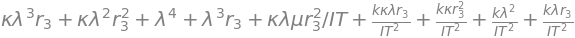

In [7]:
B = A-lamb*eye(4)
ceqn = simplify(B.det())
display(ceqn)

5.

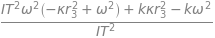

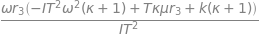

In [8]:

lsubs = ceqn.subs(lamb, i*w)
realpart = simplify(re(lsubs))
imagpart = simplify(im(lsubs))
display(realpart)
display(imagpart)
    

6.

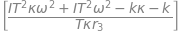

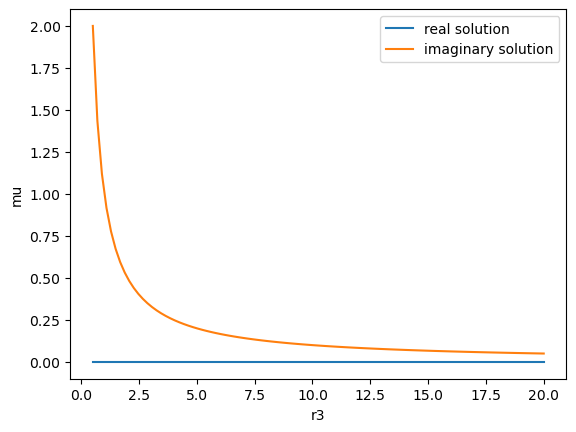

In [9]:
sol1 = solve(realpart, mu)
sol2 = solve(imagpart, mu)
display(sol1)
display(sol2)

R3 = np.linspace(0.5,20,100)
MU1 = np.linspace(0,0,len(R3))
MU2 = 1/R3

plt.figure(1)
plt.plot(R3,MU1)
plt.plot(R3,MU2)
plt.xlabel('r3')
plt.ylabel('mu')
plt.legend(['real solution','imaginary solution'])

7.

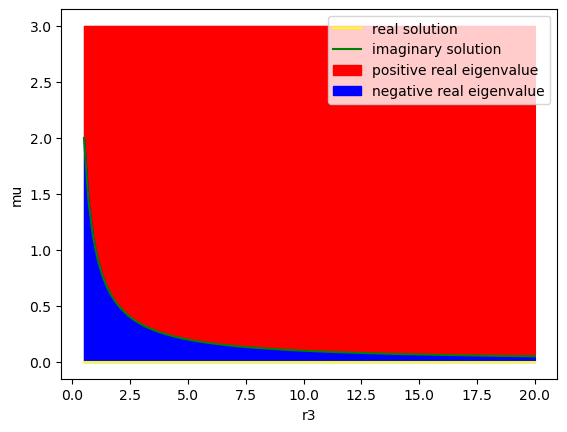

In [10]:
plt.figure(1)
plt.plot(R3,MU1, color='yellow')
plt.plot(R3,MU2, color='green')
plt.xlabel('r3')
plt.ylabel('mu')
plt.fill_between(R3, MU2, 3, color='red')
plt.fill_between(R3, MU1, MU2, color='blue')
plt.legend(['real solution','imaginary solution',
            'positive real eigenvalue',
            'negative real eigenvalue'])

## 2) Pen and Paper stability analysis of a limit cycle

2.

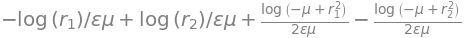

In [11]:
(t,
 r,
 r1,
 r2,
 epsilon,
 mu) = symbols("""t,
                 r,
                 r1,
                 r2,
                 epsilon,
                 mu""" , real = True)

f = 1/(epsilon*r*(mu-r**2))
sol = integrate(f, (r, r1,r2))
display(sol)

3.

In [12]:
def pevent(t, state):
    x1,x2 = state
    return x2

pevent.terminal = False
pevent.direction = -1

def Hopf(t, state, w, mu, e):
    x1, x2 = state
    dydt = [e*(mu - (x1**2+x2**2))*x1 + w*x2,
            e*(mu - (x1**2+x2**2))*x2 - w*x1]
    return dydt

C:\Users\Armond\AppData\Local\Temp\ipykernel_26416\491234562.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  P[i] = np.sqrt(u/(1-np.exp(-4*np.pi*e*u/w)*(1-u/r[i]**2)))


Text(0, 0.5, '$x_{i+1}$')

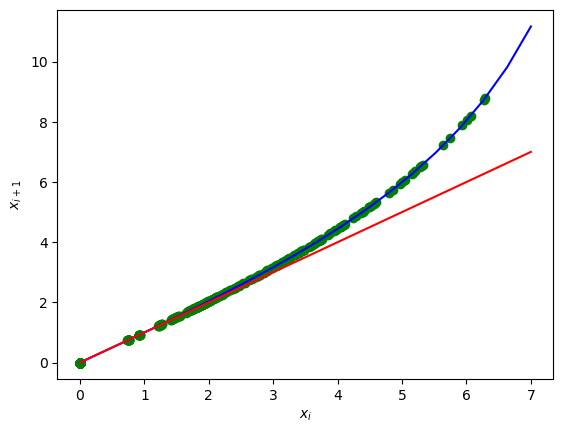

In [13]:
u = 1
w = 1
e = -0.001
dt = 0.001
time = np.linspace(0,100,int(10/dt))

length = 20
r = np.linspace(0,7,length)
P = [1]*length

plt.figure(1)

for i in range(len(r)):
    P[i] = np.sqrt(u/(1-np.exp(-4*np.pi*e*u/w)*(1-u/r[i]**2)))

    x10 = 3*np.random.rand()
    x20 = 3*np.random.rand()
    sol = solve_ivp(lambda t, y: Hopf(t, y, w, u, e), 
                [0,100], [x10,x20], 
                t_eval = time,
                events = pevent,
                rtol=1e-8, atol = 1e-8)
    P_events = sol.y_events[0]
    plt.plot(P_events[:-2], P_events[1:-1],'o', color='green')
    

plt.plot(r, P, color='blue')
plt.plot([0,r[-1]], [0, r[-1]], 'r-')
plt.xlabel("$x_{i}$")
plt.ylabel("$x_{i+1}$")


## 3) Matsuoka oscillator

1.

⎡         -a⋅m⋅x₂(t) - b⋅v₁(t) + c⎤
⎢-x₁(t) + ────────────────────────⎥
⎢                    τ            ⎥
⎢                                 ⎥
⎢         m⋅x₁(t) - v₁(t)         ⎥
⎢         ───────────────         ⎥
⎢                T                ⎥
⎢                                 ⎥
⎢         -a⋅m⋅x₁(t) - b⋅v₂(t) + c⎥
⎢-x₂(t) + ────────────────────────⎥
⎢                    τ            ⎥
⎢                                 ⎥
⎢         m⋅x₂(t) - v₂(t)         ⎥
⎢         ───────────────         ⎥
⎣                T                ⎦

x<0
Jacobian: 


⎡    -b          ⎤
⎢-1  ───  0    0 ⎥
⎢     τ          ⎥
⎢                ⎥
⎢    -1          ⎥
⎢0   ───  0    0 ⎥
⎢     T          ⎥
⎢                ⎥
⎢             -b ⎥
⎢0    0   -1  ───⎥
⎢              τ ⎥
⎢                ⎥
⎢             -1 ⎥
⎢0    0   0   ───⎥
⎣              T ⎦

Fixed Points:



 x>0
Jacobian: 


⎡     -b   -a      ⎤
⎢-1   ───  ───   0 ⎥
⎢      τ    τ      ⎥
⎢                  ⎥
⎢ 1   -1           ⎥
⎢ ─   ───   0    0 ⎥
⎢ T    T           ⎥
⎢                  ⎥
⎢-a             -b ⎥
⎢───   0   -1   ───⎥
⎢ τ              τ ⎥
⎢                  ⎥
⎢           1   -1 ⎥
⎢ 0    0    ─   ───⎥
⎣           T    T ⎦

Fixed Points:


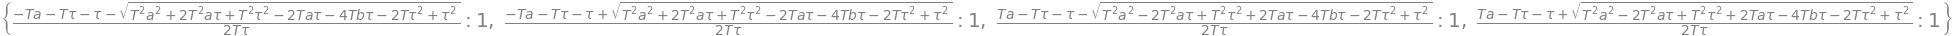

In [14]:
(t, 
 x1, 
 x2,
 v1,
 v2,
 tau,
 T,
 a,
 b,
 c,
 m) = symbols("""t, 
                 x1, 
                 x2,
                 v1,
                 v2,
                 tau,
                 T,
                 a,
                 b,
                 c,
                 m""" , real = True)

x1 = Function("x1")(t)
x2 = Function("x2")(t)
v1 = Function("v1")(t)
v2 = Function("v2")(t)


yhat = Matrix([[x1], [v1], [x2], [v2]])

g_dynamics = Matrix([[1/tau*(c-a*m*x2-b*v1)-x1],
               [1/T*(m*x1-v1)],
               [1/tau*(c-a*m*x1-b*v2)-x2],
               [1/T*(m*x2-v2)]])
display(g_dynamics)

print('x<0')
g_dynamics1 = g_dynamics.subs(m,0)

g_J1 = g_dynamics1.jacobian(yhat)
print('Jacobian: ')
display(g_J1)
print('Fixed Points:')
fixedpoints1 = solve(g_dynamics1, yhat)
display(fixedpoints1)
display(g_J1.eigenvals())

print('\n x>0')
g_dynamics2 = g_dynamics.subs(m,1)

g_J2 = g_dynamics2.jacobian(yhat)
print('Jacobian: ')
display(g_J2)

fixedpoints2 = solve(g_dynamics2, yhat)
print('Fixed Points:')
display(fixedpoints2)
A2 = simplify(g_J2.subs([(x1, fixedpoints2[x1]),
                         (v1, fixedpoints2[v1]),
                         (x2, fixedpoints2[x2]),
                         (v2, fixedpoints2[v2])]))
display(simplify(A2.eigenvals()))

Looking at the case when x<0 the system seems to have one fixed point where x1 = 0, v1 = 0, x2 = c/tau, v2 = c/tau and the fixed point is stable as the eigenvalue real parts are negative.

Looking at the case when x>0 the system seems to have one fixed point where x1, v1, x2, v2 = c/(a+b+tau) and the fixed point's stability is dependent on the Ta - Ttau - tau term.

2.

In [15]:
def matsu(t, state, a, b, c, tau, T):
    m1 = 1;
    m2 = 1;
    x1, v1, x2, v2 = state
    if x1 < 0:
        m1 = 0
    if x2 < 0:
        m2 = 0
    dydt = [1/tau*(c-a*m2*x2-b*v1)-x1,
            1/T*(m1*x1-v1),
            1/tau*(c-a*m1*x1-b*v2)-x2,
            1/T*(m2*x2-v2)]
    return dydt

Text(0.5, 0.98, 'a = 5')

<Figure size 640x480 with 0 Axes>

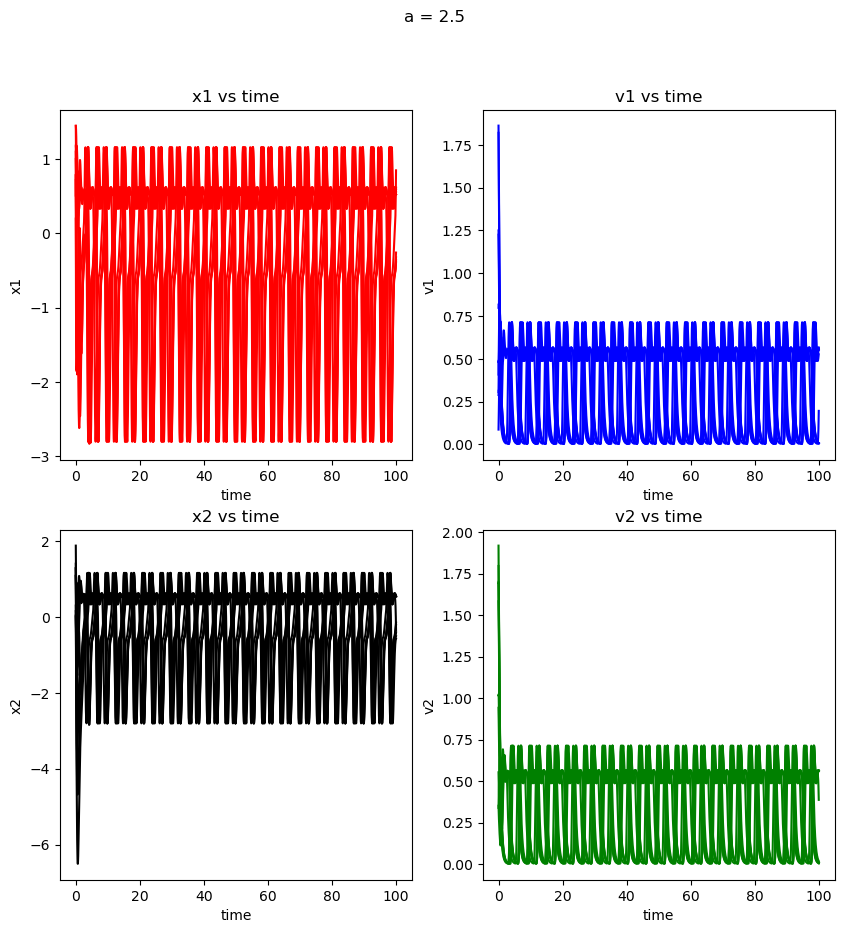

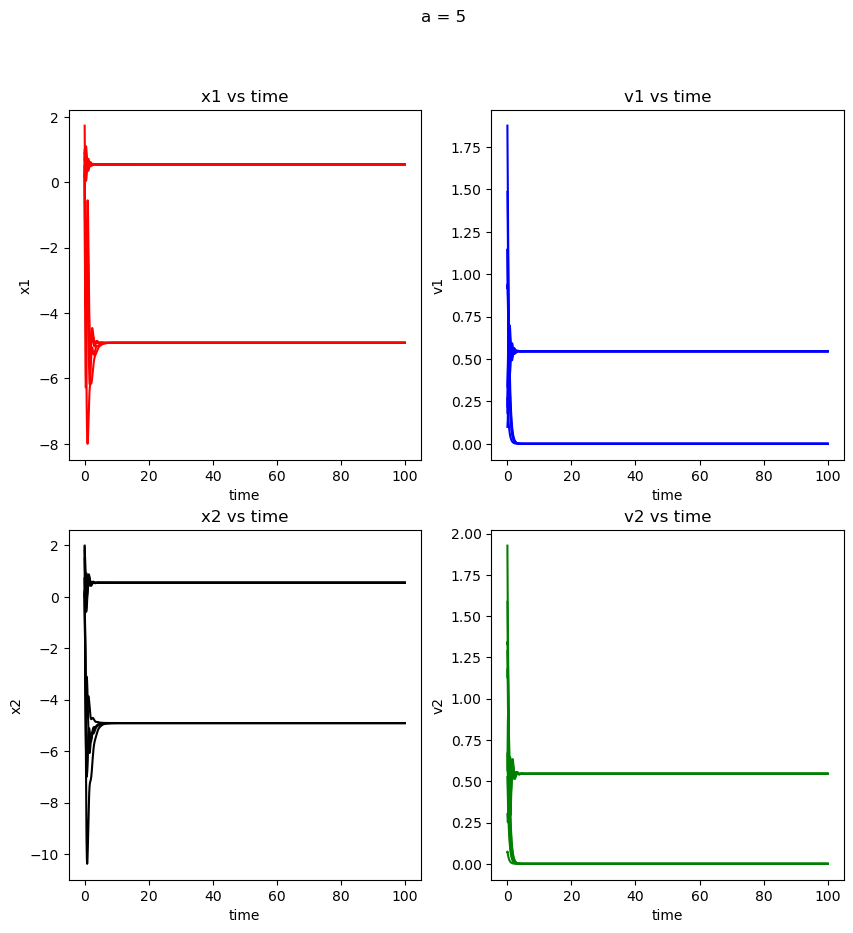

In [16]:
a = 2.5
b = 2.5
c = 1.5
tau = 0.25
T = 0.5

length = 10
dt = 0.001
time = np.linspace(0,100,int(10/dt))

plt.figure(1)
fig, axs = plt.subplots(2,2, figsize = (10,10))
for i in range(length):
    x10 = 2*np.random.rand()
    v10 = 2*np.random.rand()
    x20 = 2*np.random.rand()
    v20 = 2*np.random.rand()
    sol = solve_ivp(lambda t, y: matsu(t, y, a, b, c, tau, T), 
                [0,100], [x10, v10, x20, v20], 
                t_eval = time,
                rtol=1e-8, atol = 1e-8)
    axs[0,0].plot(sol.t, sol.y[0,:], 'r')
    axs[0,1].plot(sol.t, sol.y[1,:], 'b')
    axs[1,0].plot(sol.t, sol.y[2,:], 'k')
    axs[1,1].plot(sol.t, sol.y[3,:], color='green')
    
axs[0,0].set_ylabel('x1')
axs[0,0].set_xlabel('time')
axs[0,0].set_title('x1 vs time')
axs[0,1].set_ylabel('v1')
axs[0,1].set_xlabel('time')
axs[0,1].set_title('v1 vs time')
axs[1,0].set_ylabel('x2')
axs[1,0].set_xlabel('time')
axs[1,0].set_title('x2 vs time')
axs[1,1].set_ylabel('v2')
axs[1,1].set_xlabel('time')
axs[1,1].set_title('v2 vs time')
fig.suptitle("a = 2.5")

a = 5
b = 2.5
c = 1.5
tau = 0.25
T = 0.5
plt.figure(2)
fig, axs = plt.subplots(2,2, figsize = (10,10))
for i in range(length):
    x10 = 2*np.random.rand()
    v10 = 2*np.random.rand()
    x20 = 2*np.random.rand()
    v20 = 2*np.random.rand()
    sol = solve_ivp(lambda t, y: matsu(t, y, a, b, c, tau, T), 
                [0,100], [x10, v10, x20, v20], 
                t_eval = time,
                rtol=1e-8, atol = 1e-8)
    axs[0,0].plot(sol.t, sol.y[0,:], 'r')
    axs[0,1].plot(sol.t, sol.y[1,:], 'b')
    axs[1,0].plot(sol.t, sol.y[2,:], 'k')
    axs[1,1].plot(sol.t, sol.y[3,:], color='green')
    
axs[0,0].set_ylabel('x1')
axs[0,0].set_xlabel('time')
axs[0,0].set_title('x1 vs time')
axs[0,1].set_ylabel('v1')
axs[0,1].set_xlabel('time')
axs[0,1].set_title('v1 vs time')
axs[1,0].set_ylabel('x2')
axs[1,0].set_xlabel('time')
axs[1,0].set_title('x2 vs time')
axs[1,1].set_ylabel('v2')
axs[1,1].set_xlabel('time')
axs[1,1].set_title('v2 vs time')
fig.suptitle("a = 5")

## 4) Required Reading

The reading focused on design considerations around oscillatory systems in engineering. Bringing up some important questions on what should be addressed when looking at an oscillatory system. The reading was quite dense and so I feel the content requires a bit more review from me. I am curious to see what I pertubation on a limit cycle looks in a real world and seeing how that stability compares with something like a controller. 